# [Computational Social Science] 
## 2-1 Math Fundamentals - Student Version

This lab will provide an introduction to numpy and scipy libraries in Python. 

---

### Topics Covered
- Numpy Array
- Numpy matrix
- Local minima/maxima
- Scipy optimize
- Scipy integrate


## Intro to Numpy <a id='section 1'></a>

Numpy uses its own data structure, an array, to do numerical computations. The Numpy library is often used in scientific and engineering contexts for doing data manipulation.

For reference, here's a link to the official [Numpy documentation](https://docs.scipy.org/doc/numpy/reference/routines.html).

In [1]:
## An import statement for getting the Numpy library:
import numpy as np
## Also import csv to process the data file:
import csv

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Numpy Arrays

Arrays can hold many different data types, which makes them useful for many different purposes. Here's a few examples.

In [2]:
# create an array from a list of integers
lst = [1, 2, 3]
values = np.array(lst)
print(values)
print(lst)

[1 2 3]
[1, 2, 3]


Try to make an array with three different arrays 1-3, 4-6, and 7-9.

In [3]:
# nested array
lst = [[1,2,3],[4,5,6],[7,8,9]]
values = np.array(lst)
print(values)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### Evaluating Conditions

What does this operation do? What is the data type returned every time the ">" is evaluated, and why is it important?

**Your answer:**: Returns `True` when a number satisfies the condition and a `False` otherwise. The data type returned is a integer each time.

### Matrix

A **matrix** is a rectangular array- in Python, it looks like an array of arrays. We say that a matrix $M$ has shape **$m$x$n$**; that is, it has $m$ rows (different smaller arrays inside of it) and $n$ columns (elements in each smaller matrix. 

Matrices are used a lot in machine learning to represent sets of features and train models. Here, we'll give you some practice with manipulating them.

Start by creating an empty matrix (filled with 0s) with dimensions 10 x 2. **Hint**: Look up the documentation for numpy's "zeros" method.

In [4]:
np.zeros((10,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

### Identity Matrix

The **identity matrix** is a square matrix (i.e. size $n$x$n$) with all elements on the main diagonal equal to 1 and all other elements equal to zero. Make one below using `np.eye(n)`.

In [5]:
# identity matrix I of dimension 4x4
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Matrix Manipulation

Let's do some matrix manipulation. Here are two sample matrices to use for practice.

In [6]:
m1 = np.array([[1, 3, 1], [1, 0, 0]])
m2 = np.array([[0, 0, 5], [7, 5, 0]])
print("matrix 1 is:\n", m1)

print("matrix 2 is:\n", m2)

matrix 1 is:
 [[1 3 1]
 [1 0 0]]
matrix 2 is:
 [[0 0 5]
 [7 5 0]]


You can add two matrices together if they have the same shape. Add our two sample matrices using the `+` operator.

In [7]:
# matrix sum
m1 + m2

array([[1, 3, 6],
       [8, 5, 0]])

A matrix can also be multiplied by a number, also called a **scalar**. Multiply one of the example matrices by a number using the `*` operator and see what it outputs.

In [8]:
# scale a matrix
3 * m1

array([[3, 9, 3],
       [3, 0, 0]])

You can sum all the elements of a matrix using `.sum()`.

In [9]:
# sum of all elements in m1
m1.sum()

6

And you can get the average of the elements with `.mean()`

In [10]:
# mean of all elements in m2
m2.mean()

2.8333333333333335

Sometimes it is necessary to **transpose** a matrix to perform operations on it. When a matrix is transposed, its rows become its columns and its columns become its rows. Get the transpose by calling `.T` on a matrix (note: no parentheses)

In [11]:
# transpose of m1
m1.T

array([[1, 1],
       [3, 0],
       [1, 0]])

Other times, you may need to rearrange an array of data into a particular shape of matrix. Below, we've created an array of 16 numbers:

In [12]:
H = np.arange(1, 17)
H

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

Use `.reshape(...)` on H to change its shape. `.reshape(...)` takes two arguments: the first is the desired number of rows, and the second is the desired number of columns. Try changing H to be a 4x4 matrix.

Note: if you try to make H be a 4x3 matrix, Python will return an error. Why?

In [13]:
# make H a 4x4 matrix
H = H.reshape(4, 4)
H

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

Next, we'll talk about **matrix multiplication**. First, assign H_t below to be the transpose of H.

In [14]:
# assign H_t to the transpose of H
H_t = H.T
H_t

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

The [dot product](https://en.wikipedia.org/wiki/Matrix_multiplication#Matrix_product_.28two_matrices.29) is used a lot in optimization problems, among other things. It takes two matrices (one $m$x$n$, one $n$x$p$) and returns a matrix of size $m$x$p$. For example, the product of a 2x3 matrix and a 3x4 matrix is a 2x4 matrix (click the link for a visualization of what goes on with each individual element).

You can use the dot product in numpy with `matrix1.dot(matrix2)` or `matrix1 @ matrix2`.

Note: to use the dot product, the two matrices must have the same number of elements and the number of *rows* in the first matrix must equal the number of *columns* in the second. This is why it's important to know how to reshape and transpose matrices!

A property of the dot product is that the product of a matrix and the identity matrix is just the first matrix. Check that that is the case below for the matrix `H`.

In [15]:
H

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [16]:
# matrix product
I = np.eye(4)
# a matrix m's matrix product with the identity matrix is matrix m
H.dot(I)

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.],
       [13., 14., 15., 16.]])

Note that we keep using the term 'product', but we don't use the `*` operator. Try using `*` to multiply  `H` and `I` together.

In [17]:
# element-wise multiplication
H * I

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  6.,  0.,  0.],
       [ 0.,  0., 11.,  0.],
       [ 0.,  0.,  0., 16.]])

How is the matrix product different from simply multiplying two matrices together?


**YOUR ANSWER:** 

The matrix product is noncomunicative, as opposed to multiplying two matrices together. 

#### Matrix inverse
##### Theorem: the product of a matrix m and its inverse is an identity matrix

Using the above theorem, to solve for x in Ax=B where A and B are matrices, what do we want to multiply both sides by?

Your answer here: $A^{-1}$

You can get the inverse of a matrix with `np.linalg.inv(my_matrix)`. Try it in the cell below.

Note: not all matrices are invertible.

In [18]:
m3 = np.array([[1, 0, 0, 0], [0, 2, 0, 0], [0, 0, 3, 0], [0, 0, 0, 4]])

# calculate the inverse of m3
m3_inverse = np.linalg.inv(m3)

print("matrix m3:\n", m3)
print("\ninverse matrix m3:\n", m3_inverse)

matrix m3:
 [[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]

inverse matrix m3:
 [[1.         0.         0.         0.        ]
 [0.         0.5        0.         0.        ]
 [0.         0.         0.33333333 0.        ]
 [0.         0.         0.         0.25      ]]


In [19]:
# do we get the identity matrix?
m3_inverse.dot(m3)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

#### Exercise
In machine learning, we often try to predict a value or category given a bunch of data. The essential model looks like this:

$$ \large
Y =  X^T \theta
$$

Where $Y $ is the predicted values (a vector with one value for every row of X)), $X$ is a $m$x$n$ matrix of data, and $\theta$ (the Greek letter 'theta') is a **parameter** (an $n$-length vector). For example, X could be a matrix where each row represents a person, and it has two columns: height and age. To use height and age to predict a person's weight (our $y$), we could multiply the height and the age by different numbers ($\theta$) then add them together to make a prediction($y$).

The fundamental problem in machine learning is often how to choose the best $\theta$. Using linear algebra, we can show that the optimal theta is:

$$\large
 \hat{\theta{}} = \left(X^T  X\right)^{-1} X^T Y
$$

This problem specification should look familiar to you - it is the same as regression! As we'll see in the coming weeks, you have already been exposed to many machine learning algorithms already in your introductory statistics courses. The problem of estimating a model is the same, and the difference will mainly come in framing the ultimate goal of the model.

You now know all the functions needed to find theta. Use transpose, inverse, and matrix product operations to calculate theta using the equation above and the X and y data given below. 
*Note that the equation above is expecting dot products of matrices, not element-wise multiplication!*

In [22]:
# example real values (the numbers 0 through 50 with random noise added)
y = np.arange(50)+ np.random.normal(scale = 10,size=50)

# Transpose sample X
x = np.array([np.arange(50)]).T

# add a column of ones to represent an intercept term
X = np.hstack([x, np.ones(x.shape)])

# find the best theta 
# tip: use np.linalg.inv to get the inverse, and plug in the normal equation above
theta = np.linalg.inv(X.T @ X) @ X.T @ y
theta

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


array([0.90963459, 1.77469185])

In this case, our X is a matrix where the first column has values representing a feature, and the second column is entirely ones to represent an intercept term. This means our theta is a vector [m, b] for the equation $y=mx+b$, which you might recognize from algebra as the equation for a line (where $m$ is the slope of the line and $b$ is the intercept). Let's see how well our predictor line fits the data.

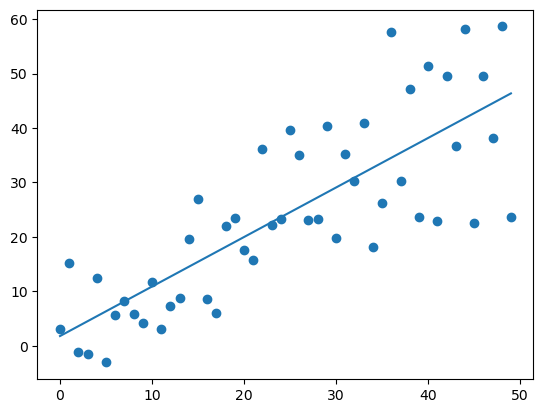

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot the data
plt.scatter(x.T,y)

#plot the fit line
plt.plot(x.T[0], X @ theta);

Not bad!

While it's good to know what computation goes into getting optimal parameters, it's also good that sklearn has a function that will take in an X and a y and return the best theta. Run the cell below to use scikit-learn to estimate the parameters. It should output values very near to the ones you found. We'll learn how to use scikit-learn in the next lab!

In [24]:
# find optimal parameters for linear regression
from sklearn import linear_model

lin_reg = linear_model.LinearRegression(fit_intercept=True)
lin_reg.fit(x, y)
print(lin_reg.coef_[0], lin_reg.intercept_)

0.9096345913636561 1.7746918460195182


## Maxima and Minima <a id='section 2'></a>

The extrema of a function are the largest value (maxima) and smallest value (minima) of the function.

We say that f(a) is a **local maxima** if $f(a)\geq f(x)$ when x is near a.

We say that f(a) is a **local minima** if $f(a)\leq f(x)$ when x is near a.

Global vs local extrema (credit: Wikipedia)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Extrema_example_original.svg/440px-Extrema_example_original.svg.png" style="width: 500px; height: 275px;" />

By looking at the diagram , how are local maxima and minima of a function related to its derivative? Remember that the derivative of a function represents its slope at a particular value of x. What is the slope at a functions minima and maxima?

**YOUR ANSWER**: The derivative of the function is 0 at the local maxima and minima. In other words, the slope is 0.

Are global maxima also local maixma? Are local maxima global maxima?

**YOUR ANSWER**: Global maxima are also local maxima, but local maxima are not necessarily global maxima.

## Optional: Intro to Scipy <a id='section 3'></a>

The following part of this notebook is optional. We won't be taking a lot of derivatives in this course, but we reintroduce them to motivate your understanding of **optimization**. 


### Optimize

Derivatives are essential for understanding some of the methods we'll be learning soon, including gradient descent, neural networks, and regularized regression methods. More broadly, most machine learning learning applications are best thought of as **optimization problems** where we are trying to minimize a **cost function**. More simply, we want to minimize our prediction errors.

`scipy.optimize` is a package that provides several commonly used optimization algorithms. Today we'll learn minimize.

In [25]:
# importing minimize function
from scipy.optimize import minimize

Let's define a minimization problem:

minimize $x_1x_4(x_1+x_2+x_3)+x_3$ under the conditions:
1. $x_1x_2x_3x_4\geq 25$
2. $x_1+x_2+x_3+2x_4 = 14$
3. $1\leq x_1,x_2,x_3,x_4\leq 5$

Hmmm, looks fairly complicated, but don't worry, scipy's got it

In [26]:
# let's define our function
def objective(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    return x1*x4*(x1+x2+x3)+x3

In [27]:
# define constraints
def con1(x):
    return x[0]*x[1]*x[2]*x[3] - 25
def con2(x):
    return 14 - x[0] - x[1] - x[2] - 2*x[3]

constraint1 = {'type': 'ineq', 'fun': con1}  # constraint 1 is an inequality constraint
constraint2 = {'type': 'eq', 'fun': con2} # constraint 2 is an equality constraint

cons = [constraint1, constraint2]

In [28]:
# define bounds
bound = (1, 5)
bnds = (bound, bound, bound, bound) #the same bound applies to all four variables

In [29]:
# We need to supply initial values as a starting point for minimize function
x0 = [3, 4, 2, 3]
print(objective(x0))

83


Overall, we defined objective function, constraints, bounds, and initial values. Let's get to work.

We'll use [Sequential Least Squares Programming optimization algorithm (SLSQP)](http://www.pyopt.org/reference/optimizers.slsqp.html)

In [30]:
solution = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=cons)

In [31]:
print(solution)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 21.500000000000377
       x: [ 1.000e+00  5.000e+00  5.000e+00  1.500e+00]
     nit: 3
     jac: [ 1.800e+01  1.500e+00  2.500e+00  1.100e+01]
    nfev: 15
    njev: 3


In [32]:
# Display optimal values of each variable
solution.x

array([1. , 5. , 5. , 1.5])

#### Exercise
Find the optimal solution to the following problem:

minimize $x1^2+x2^2+x3^2$, under conditions:
1. $x1 + x2\geq 6$
2. $x3 + 2x2\geq 4$
3. $1.5\leq x1, x2, x3\leq 8$

Tip: 3**2 gives square of 3

In [33]:
def func(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    return (x1 ** 2) + (x2 ** 2) + (x3 ** 2)
def newcon1(x):
    return x1 + x2 - 6
def newcon2(x):
    return x3 + 2 * x2 - 4

Take note of scipy's documentation on constraints:

> "Equality constraint means that the constraint function result is to be zero whereas inequality means that it is to be non-negative."

In [34]:
newcons1 = {'type': 'ineq', 'fun': newcon1}
newcons2 = {'type': 'ineq', 'fun': newcon2}
newcons = [newcons1, newcons2]
bd = (1.5, 8)
bds = (bd, bd, bd)
newx0 = [5, 2, 2]


sum_square_solution = minimize(func, newx0, constraints= newcons, method= 'SLSQP', bounds = bds, )
sum_square_solution

NameError: name 'x1' is not defined

### Integrate

The last concept we'll introduce is **integration**. You can think of integration as the reverse operation of a derivative. One common application of the integral is finding the area under a curve. Let's take a look:  

`scipy.integrate.quad` is a function that integrates a function from a to b using a technique from QUADPACK library.

In [ ]:
# importing integrate package
from scipy import integrate

In [ ]:
# define a simple function
def f(x):
    return np.sin(x)

In [ ]:
# integrate sin from 0 to pi
integrate.quad(f, 0, np.pi)

Our quad function returned two results, first one is the result, second one is an estimate of the absolute error

#### Exercise
Find the integral of $x^2 + x$ from 3 to 10

In [ ]:
#define the function
def f1(x):
    return _


#find the integral
integrate.quad(_)

#### Integrate a normal distribution

Within statistics, integration is important because it is related to the way we convert a **probability density function** to a **cumulative distribution function**.

In [ ]:
# let's create a normal distribution with mean 0 and standard deviation 1 by simpy running the cell
mu, sigma = 0, 1
s = np.random.normal(mu, sigma, 100000)

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

In [ ]:
# importing normal d
from scipy.stats import norm

CDF is cumulative distribution function. CDF(x) is the probability that a normal distribution takes on value less than or equal to x.

For a standard normal distribution, what would CDF(0) be?

**Answer**:

Run the cell below to confirm your answer

In [ ]:
norm.cdf(0)

Using the cdf, integrate the normal distribution from -0.5 to 0.5

In [ ]:
norm.cdf(.5) - norm.cdf(-.5)

What is the relationship between a probability distribution and a p-value? **Hint**: What is the CDF in the tails of the distribution?

In [ ]:
# Hint: What values do we get here? What do they mean?
print(norm.cdf(-1.65))
print(1 - norm.cdf(1.65))

**Answer**: 

---
Materials for this notebook were based on the notebook developed by Tian Qin for [Legal Studies 123: Data, Prediction, and Law](https://github.com/Akesari12/LS123_Data_Prediction_Law_Spring-2019).